# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [50]:
import pandas as pd

df = pd.read_csv("prestamos.csv")

df["home_ownership_n"] = df["home_ownership_n"].astype("category")
df["emp_length_n"] = df["emp_length_n"].astype("category")
df["Default"] = df["Default"].astype("category")

df.head()

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
0,32000,car,135000.0,18.93,687.0,MORTGAGE,1,0
1,32000,car,90000.0,9.29,822.0,MORTGAGE,10,1
2,30000,car,95000.0,1.34,722.0,RENT,11,0
3,25750,car,230000.0,6.42,747.0,MORTGAGE,11,0
4,25200,car,72000.0,30.95,692.0,OWN,11,0


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,13794.0,14507.833116,9037.938271,1000.0,7300.0,12000.000,20000.0000,40000.00
revenue,13794.0,79737.299507,56463.579892,7000.0,48000.0,68000.000,97000.0000,1650000.00
dti_n,13794.0,18.825106,9.795986,0.0,12.2,18.085,24.7575,190.87
fico_n,13794.0,699.106822,32.825754,662.0,672.0,692.000,717.0000,847.50


In [ ]:
""" Los datos que observamos en el dataframe nos permiten ver que en cuanto a la cantidad de dinero solicitada en los
prestamos tiene una considerable desviación tipica indicando que los datos está muy dispersos como también se observa en sus 
mínimos y máximos que difieren mucho (1.000 hasta 40.000) al igual nos pasa con los ingresos nuales de las personas que han 
solicitado los prestamos, además habiendo una gran diferencia desde el percentil 75 hasta el MAX (97.000 hasta 1.650.000)
concluyendo en que hay unos pocos clientes que al tener grandes ingresos anuales influyen mucho en la media pese a ser menos
ya que la media se encuentra entre los datos del percentil 50 y del 75.
En cuanto al porcentaje de endeudamiento vemos que la desviación típica es considerable al suponer la mitad del valor de su
media pero hay que considerar su máximo que se diferencia considerablemente del percentil 75 (24 hasta 190), lo cual nos
indicaría que probablemente haya un muy pequeño grupo de personas que han pedido préstamos muy por encima de sus ingresos. 
Finalmente el indicador de solvencia nos muestra que de media los prestamos son "Buen crédito", y al no tener una desviación
típica muy elevada nos indica que los datos no están muy dispersos en esta variable por lo que podemos afirmar que casi todos
los prestamos dados serán "Buen préstamo", como mínimo "Crédito aceptable" o llegando a ser "Excelente crédito". """

In [34]:
correl=df.corr()
correl['loan_amnt']

loan_amnt    1.000000
revenue      0.424460
dti_n        0.034134
fico_n       0.090869
Name: loan_amnt, dtype: float64

In [ ]:
""" Con estos datos podemos ver que la cantidad pedida en un préstamo está ligéramente correlacionada con los inglesos
anuales que tienen las personas que han pedido estos préstamos por lo que es más probable que si ha pedido un préstamo alto
una persona también tenga unos mayores ingresos. Sin embargo, tanto el dti_n como el fico_n están muy débilmente correlacionados
positivamente con el loan_amnt, con lo cual podemos asumir que no hay una dependencia entre estas variables. """

<AxesSubplot:>

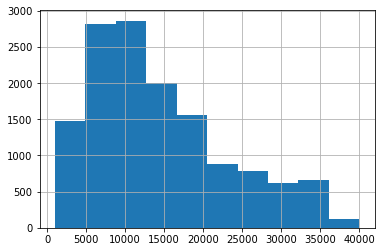

In [35]:
df.loan_amnt.hist()

In [ ]:
""" Como podemos observar en el diagrama de dispersión la mayoría de los préstamos han sido de cantidades entre 5.000 y 13.000,
a partir de préstamos de 21.000 empieza a disminuir considerablemente y en préstamos entre 36.000 y 40.000 apenas hay datos """

In [36]:
correl['revenue']

loan_amnt    0.424460
revenue      1.000000
dti_n       -0.137616
fico_n       0.091204
Name: revenue, dtype: float64

In [ ]:
""" La variable revenue está débilmente correlacionada con dti_n (correlación negativa, es decir, cuando aumenta revenue 
disminuye dti_n) y con fico_n (correlación positiva) por lo que podemos asumir que no tienen demasiada dependencia entre sí."""

<AxesSubplot:>

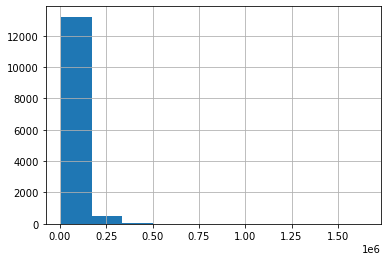

In [37]:
df.revenue.hist()

In [ ]:
""" Al observar el diagrama generado vemos que al haber una gran diferencia entre unos datos y otros la escala del diagrama
para abarcar todos los datos de revenue la mayoría de datos son del orden de 10^4 por lo que se han agrupado entre
el 0.0 y el 0.15 * 10^6 mientras que hay un dato máximo que está en 1.65 * 10^6 """

In [38]:
correl['dti_n']

loan_amnt    0.034134
revenue     -0.137616
dti_n        1.000000
fico_n      -0.057580
Name: dti_n, dtype: float64

In [ ]:
""" La variable dti_n está débilmente correlacionada negativamente con fico_n """

<AxesSubplot:>

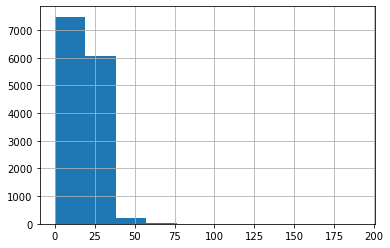

In [39]:
df.dti_n.hist()

In [ ]:
""" Con el diagrama anterior observamos que la mayoría de datos se encuentran comprendidos entre el 0 y el 32, después de
ello disminuye considerablemente hasta el 75 y finalmente hay un único dato en el 190 que provoca que la escala del diagrama
quede descompensado por la izquierda. """

In [40]:
correl['fico_n']

loan_amnt    0.090869
revenue      0.091204
dti_n       -0.057580
fico_n       1.000000
Name: fico_n, dtype: float64

<AxesSubplot:>

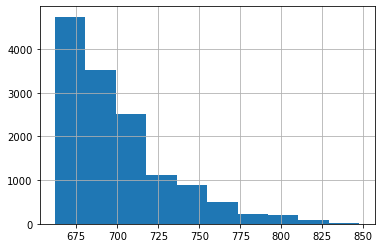

In [41]:
df.fico_n.hist()

In [ ]:
""" El diagrama de fico_n nos indica que la mayoría de gente que ha pedido préstamos son de créditos aceptables al estar entre
 620 y 680, apartir de aquí va disminuyendo gradualmente indicandonos que hay menos personas con muy grande fico_n """


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [42]:
pd.value_counts(df['Default'])

0    10785
1     3009
Name: Default, dtype: int64

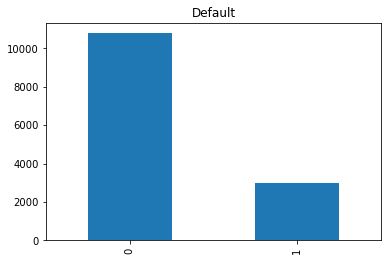

In [43]:
plot = df['Default'].value_counts().plot(kind='bar',
                                            title='Default')

In [ ]:
""" Los datos que nos ofrece Default nos indican que un 78% cumplen con el contrato de préstamo mientras que el 22% no."""

In [25]:
pd.value_counts(df['home_ownership_n'])

MORTGAGE    6850
RENT        5349
OWN         1586
OTHER          9
Name: home_ownership_n, dtype: int64

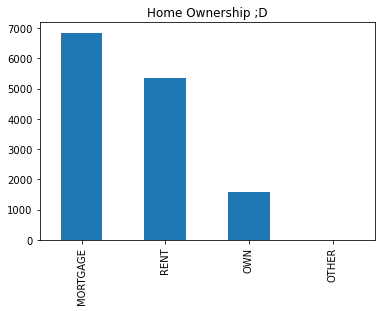

In [30]:
plot = df['home_ownership_n'].value_counts().plot(kind='bar',
                                            title='Home Ownership ;D')

In [ ]:
""" Los datos de home_ownership nos indican que hay aproximadamente un 50% que están hipotecados mientras que un 38% están
de alquiler, un 11% son propietarios y un 1% que tienen clasificación 'OTHER'. """

In [26]:
pd.value_counts(df['emp_length_n'])

11    4612
3     1232
1     1174
4     1174
2      909
0      875
6      860
5      815
9      599
7      580
10     494
8      470
Name: emp_length_n, dtype: int64

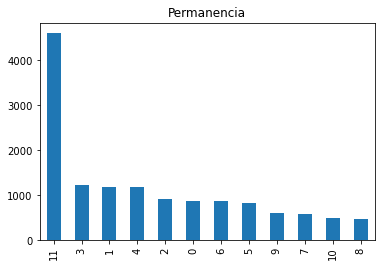

In [31]:
plot = df['emp_length_n'].value_counts().plot(kind='bar',
                                            title='Permanencia')

In [ ]:
""" Los datos de emp_lenght, nos indican que la mayoría tienen más de 11 años de permanencia mientras que el resto está bastante
distribuido. """

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [56]:
df2 = pd.DataFrame()
df2["loan_amnt"] = df["loan_amnt"]
df2["revenue"] = df["revenue"]
df2["dti_n"] = df["dti_n"]
df2["fico_n"] = df["fico_n"]
df2

,loan_amnt,revenue,dti_n,fico_n
0,32000,135000.0,18.93,687.0
1,32000,90000.0,9.29,822.0
2,30000,95000.0,1.34,722.0
3,25750,230000.0,6.42,747.0
4,25200,72000.0,30.95,692.0
...,...,...,...,...
13789,1275,42000.0,31.89,792.0
13790,1200,36000.0,12.27,747.0
13791,1000,76000.0,25.26,702.0
13792,1000,32000.0,17.70,747.0


In [63]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(df2)
arrayDf = scaler.transform(df2) # Lo almacenamos en el dataset original
arrayDf

array([[0.79487179, 0.07790627, 0.09917745, 0.13477089],
       [0.79487179, 0.05051735, 0.04867187, 0.86253369],
       [0.74358974, 0.05356056, 0.00702049, 0.32345013],
       ...,
       [0.        , 0.04199635, 0.13234138, 0.21563342],
       [0.        , 0.01521607, 0.09273327, 0.45822102],
       [0.        , 0.02921485, 0.0780636 , 0.10781671]])

In [66]:
df_scaled = pd.DataFrame(data=arrayDf, columns=['loan_amnt', 'revenue', 'dti_n', 'fico_n'])
df_scaled.describe()

,loan_amnt,revenue,dti_n,fico_n
count,13794.000000,13794.000000,13794.000000,13794.000000
mean,0.346355,0.044271,0.098628,0.200037
std,0.231742,0.034366,0.051323,0.176958
min,0.000000,0.000000,0.000000,0.000000
25%,0.161538,0.024954,0.063918,0.053908
50%,0.282051,0.037127,0.094750,0.161725
75%,0.487179,0.054778,0.129709,0.296496
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
""" Las variables de este conjunto tienen una escala muy distinta entre ellas, habiendo algunos del orden de 10^1 otras de 10^6
por lo que hemos decidido reescalarlo con MinMax por conveniencia."""

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [99]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [72]:
def plot_clusters(X, labels=None, centers=None):
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

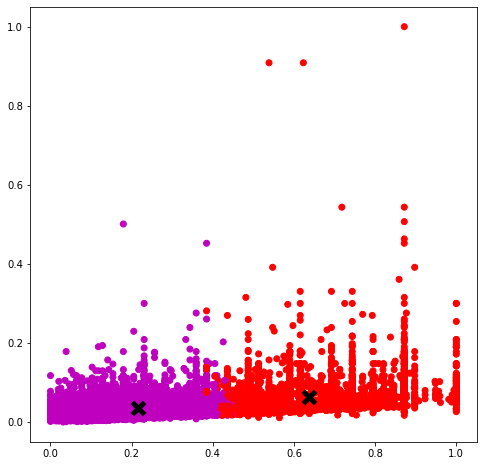

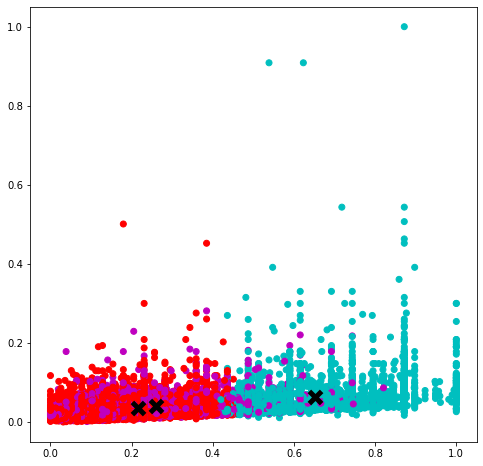

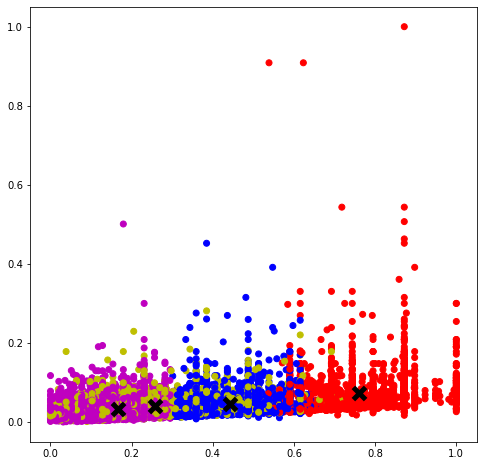

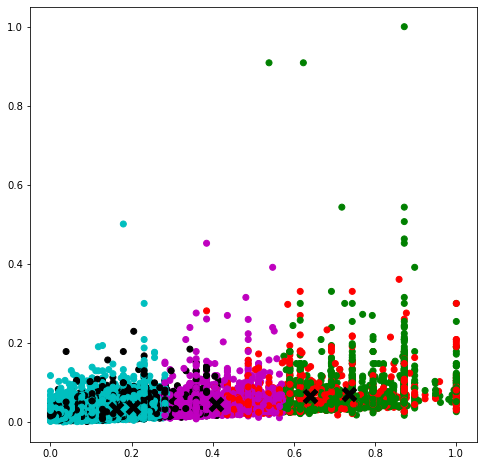

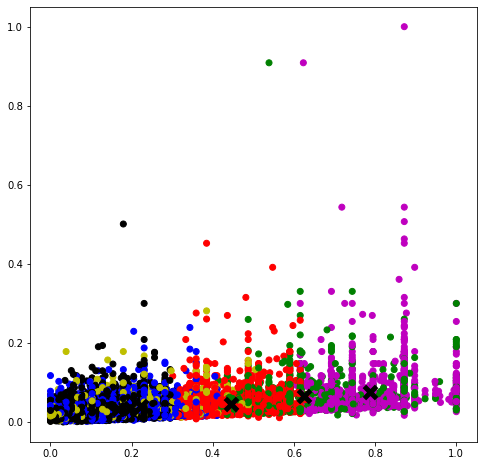

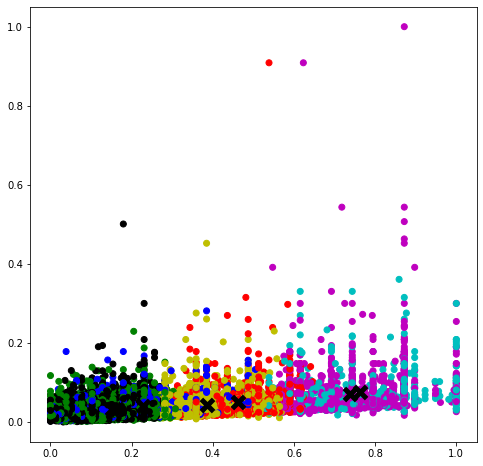

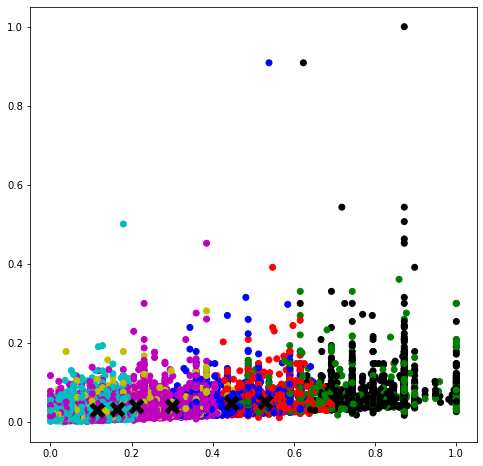

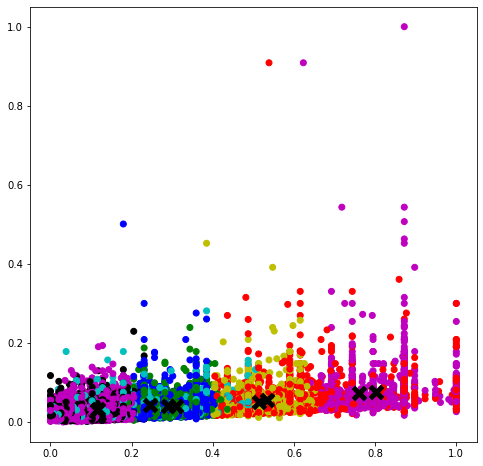

In [92]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(arrayDf)
    plot_clusters(arrayDf, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(arrayDf, km.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

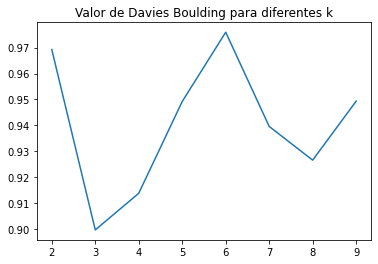

In [91]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

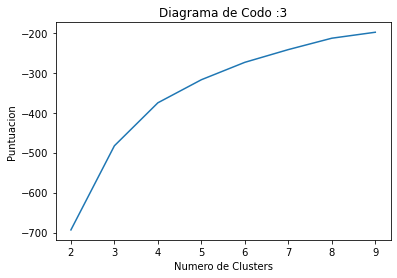

In [98]:
Nc = range(2, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(arrayDf).score(arrayDf) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntuacion')
plt.title('Diagrama de Codo :3')
plt.show()

In [105]:
range_n_clusters = range(2, 10)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 333
                    )
    cluster_labels = modelo_kmeans.fit_predict(arrayDf)
    silhouette_avg = silhouette_score(arrayDf, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

valores_medios_silhouette

[0.42522364812403274,
 0.4083085404580501,
 0.35754688448905586,
 0.34579061385994253,
 0.3337200843307371,
 0.3264210356031316,
 0.31181263032280326,
 0.3074779782822138]

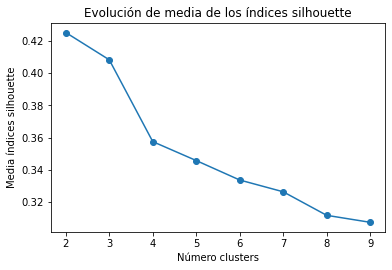

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [ ]:
""" El número óptimo de cluster es 3 debido a que en el diagrama de codo el codo está en el 3 y en el índice de Davies Boulding
vemos que el mínimo está en 3 (para silhouette el máximo será 3. """

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.